In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline


In [2]:
sns.set_context('notebook')
sns.set_style('white')


**Importing Data : Linear Regression with ONE variable**

In [3]:
#data = np.loadtxt('Data/ex1data1.txt', delimiter = ',')
#data[1:10,:]


In [4]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]


In [5]:
def plotXY():
    plt.scatter(X[:,1],y,s=30,c='red',marker='x')
    plt.xlabel('Population of city')
    plt.ylabel('Profit in Ten Thousands $')
    plt.title('Plotting the Two available features')
    plt.plot()
    

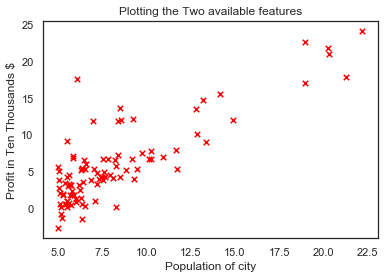

In [6]:
plotXY()


In [7]:
# Initializing Theta
#theta = np.array([[0],[0]])


In [8]:
def ComputeCost(X,y,theta=[[0],[0]]):
    h = X.dot(theta)
    m = y.size
    return 1/(2*m) * np.sum(np.square(h - y)) # Return J; J is a scalar

In [9]:
J = ComputeCost(X,y)
print(J)


32.072733877455676


### Gradient Descent Algorithm

![](Data/gdu.png)


In [10]:
def GradientDescent(X,y,alpha=0.01,num_iters=1500):
    m = y.size
    theta =np.zeros(X.shape[1]).reshape(2,1)
    J_history = np.zeros(num_iters)
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = ComputeCost(X, y, theta)
    return(theta,J_history)                                                                     

[[-3.63029144]
 [ 1.16636235]]
4.483388256587725


Text(0.5, 0, 'Number of Iterations')

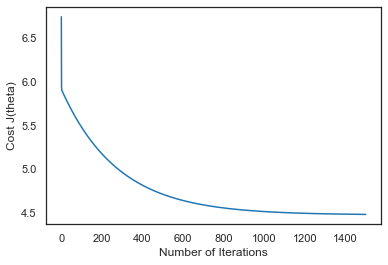

In [11]:
theta,cost_J = GradientDescent(X,y)
print(theta)
print(ComputeCost(X,y,theta))
plt.plot(cost_J)
plt.ylabel("Cost J(theta)")
plt.xlabel("Number of Iterations")

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)

In [13]:
reg.score(X,y)

0.7020315537841397

In [14]:
reg.coef_

array([[0.        , 1.19303364]])

In [15]:
ypred = reg.predict(X)

In [16]:
from sklearn import metrics
print(metrics.mean_squared_error(y,ypred))
print(metrics.mean_absolute_error(y,ypred))

8.953942751950358
2.194245398827005


In [17]:
# Loading the data for multivariable regression
multidata  = np.loadtxt('Data/ex1data2.txt',delimiter = ',')
multidata[1:10,:]

array([[1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05]])

In [18]:
# initializing the Theta as per the size of data TWO Features so THREE Thetas needed.

Xm = np.c_[np.ones(multidata.shape[0]),multidata[:,0:2]]
ym = np.c_[multidata[:,2]]

In [19]:
# Preparing the Scaled Data 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xscaled = np.c_[np.ones(multidata.shape[0]),scale.fit_transform(multidata[:,0:2])]
yscaled = scale.fit_transform(ym)

In [20]:
# Retreiving the mean and Standard Deviation 

mu = np.mean(Xm,axis=0)
std = np.std(Xm,axis=0)

In [21]:
def NormalEquation(X,y):
    FP = Xm.T.dot(Xm)
    inverse = np.linalg.inv(FP)
    SP = Xm.T.dot(ym)
    return inverse.dot(SP)

In [22]:
LearntThetas = NormalEquation(Xscaled,ym)
LearntThetas

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [23]:
# Testing for a particular HOUSE of 6500 SQ FEET and 3 BEDROOM 

Xtest = [1,6500,3]
price = LearntThetas.T.dot(Xtest)
price

array([968253.23332038])

In [24]:
def GradientMulti(X,y,theta,alpha=0.01,num_iters = 500):
    theta_hist = np.zeros((num_iters,3))
    J_hist = np.zeros(num_iters)
    m = X.shape[0]
    for i in np.arange(num_iters):
        h = np.dot(X,theta)
        theta = theta - (alpha/m) * (X.T.dot(h - y))
        theta_hist[i,:] = theta.T
        J_hist[i] = ComputeCost(X,y,theta)
    return(theta,J_hist,theta_hist)

In [25]:
thetatest = np.random.rand(3,1)
(thetatoptim,J_hist,thetahist) = GradientMulti(Xscaled,ym,thetatest)

In [26]:
thetatoptim

array([[ 3.38175985e+05],
       [ 1.03032122e+05],
       [-2.02321965e+02]])

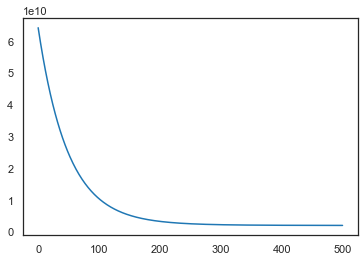

In [27]:
plt.plot(J_hist)

In [28]:
# Testing for a particular HOUSE of 6500 SQ FEET and 3 BEDROOM 

Xtest = [1,6500,3]
price = thetatoptim.T.dot(Xtest)
print(price)

[6.70046359e+08]
